In [1]:
# Notebook: SciKit Learn Decision Trees
# Author: Thomas Purk
# Date: 2025-03-28
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# Reference: https://www.ibm.com/think/topics/random-forest
# Reference: https://www.ibm.com/think/topics/decision-trees
# Reference: https://www.udemy.com/certificate/UC-a9c3a1ee-f780-447f-8bdf-5a9c2afb8dd0/ (data)


# SciKit Learn Decision Trees & Random Forest Classifiers

> A decision tree is a non-parametric supervised learning algorithm, which is utilized for both classification and regression tasks. It has a hierarchical, tree structure, which consists of a root node, branches, internal nodes and leaf nodes.

> Random forest is a commonly-used machine learning algorithm, trademarked by Leo Breiman and Adele Cutler, that combines the output of multiple decision trees to reach a single result. Its ease of use and flexibility have fueled its adoption, as it handles both classification and regression problems.


**Data**

The files are no longer available from the original source, Lending Club. The file used here came from a Udemy cource, that referenced the origial Lending Club data [https://www.udemy.com/certificate/UC-a9c3a1ee-f780-447f-8bdf-5a9c2afb8dd0/](https://www.udemy.com/certificate/UC-a9c3a1ee-f780-447f-8bdf-5a9c2afb8dd0/)

- credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.

- purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").

- int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.

- installment: The monthly installments owed by the borrower if the loan is funded.

- log.annual.inc: The natural log of the self-reported annual income of the borrower.

- dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).

- fico: The FICO credit score of the borrower.
days.with.cr.line: The number of days the borrower has had a credit line.

- revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).

- revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).

- inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.

- delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.

- pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [2]:
# Notebook Setup

# Data, Arrays, Linear Algebra
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Add for better Jupyter Notebook compatibility
%matplotlib inline

# Modeling
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Prevent Pandas and other warnings from displaying above outputcells, improve readability
import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings(action='once') # See warnings one time#

In [3]:

# Load Data
# Source: Obtained from the "Python for Data Science and Machine Learning Bootcamp"
# Reference: https://www.udemy.com/certificate/UC-a9c3a1ee-f780-447f-8bdf-5a9c2afb8dd0/
from google.colab import files
uploaded = files.upload()

Saving loan_data.csv to loan_data.csv


In [4]:

# Load Data - continued
filename = list(uploaded.keys())[0]  # Get uploaded filename
df = pd.read_csv(filename)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
# The purpose feature seems to be the only columns with text categorical data
df['purpose'].value_counts()

,count
purpose,
debt_consolidation,3957
all_other,2331
credit_card,1262
home_improvement,629
small_business,619
major_purchase,437
educational,343


In [7]:
# Get some basic stats on the numberical features in the dataframe
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


## Explorator Data Analysis (EDA)

Text(0.5, 0, 'FICO')

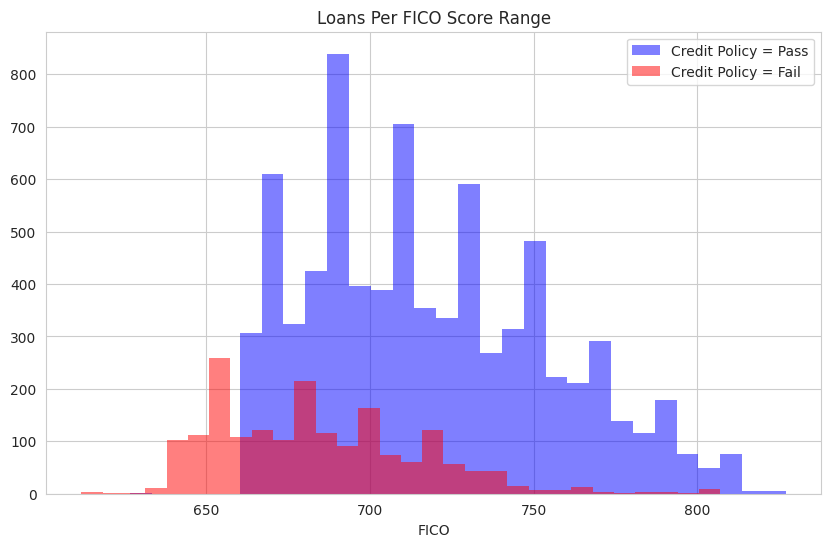

In [8]:
# Investigate FICO Scores for Pass/Fail Credit Policy for Loans
plt.figure(figsize=(10,6))

# Meets Underwriting Cirteria
df_pass = df[df['credit.policy']==1]

df_pass['fico'].hist(
    alpha=0.5,
    color='blue',
    edgecolor='none',
    label='Credit Policy = Pass',
    bins=30
)

# Does NOT Meet Underwriting Cirteria
df_fail = df[df['credit.policy']==0]

df_fail['fico'].hist(
    alpha=0.5,
    color='red',
    edgecolor='none',
    label='Credit Policy = Fail',
    bins=30
)
plt.title('Loans Per FICO Score Range')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

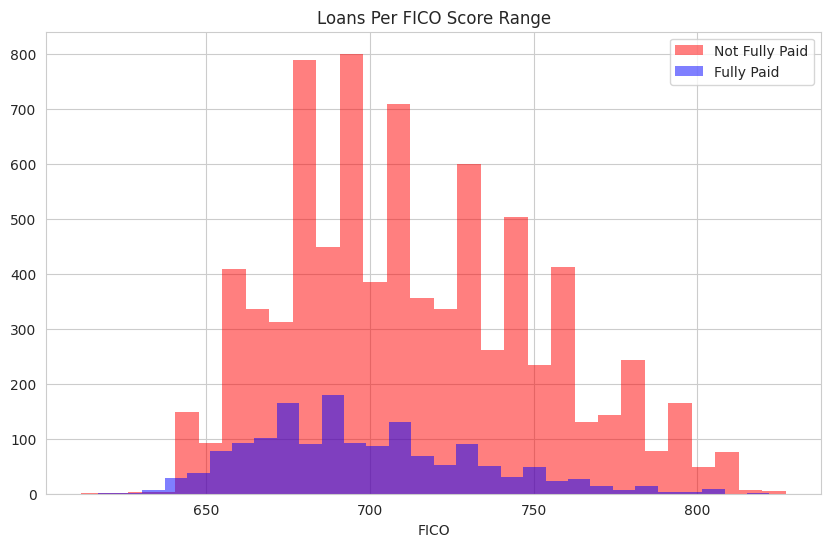

In [ ]:
# Investigate Paid/Not Paid Status for Loans
plt.figure(figsize=(10,6))

# Not Paid
df_not_paid = df[df['not.fully.paid']==0]

df_not_paid['fico'].hist(
    alpha=0.5,
    color='red',
    edgecolor='none',
    label='Not Fully Paid',
    bins=30
)

# Paid
df_paid = df[df['not.fully.paid']==1]

df_paid['fico'].hist(
    alpha=0.5,
    color='blue',
    edgecolor='none',
    label='Fully Paid',
    bins=30
)

plt.title('Loans Per FICO Score Range')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'Purpose')

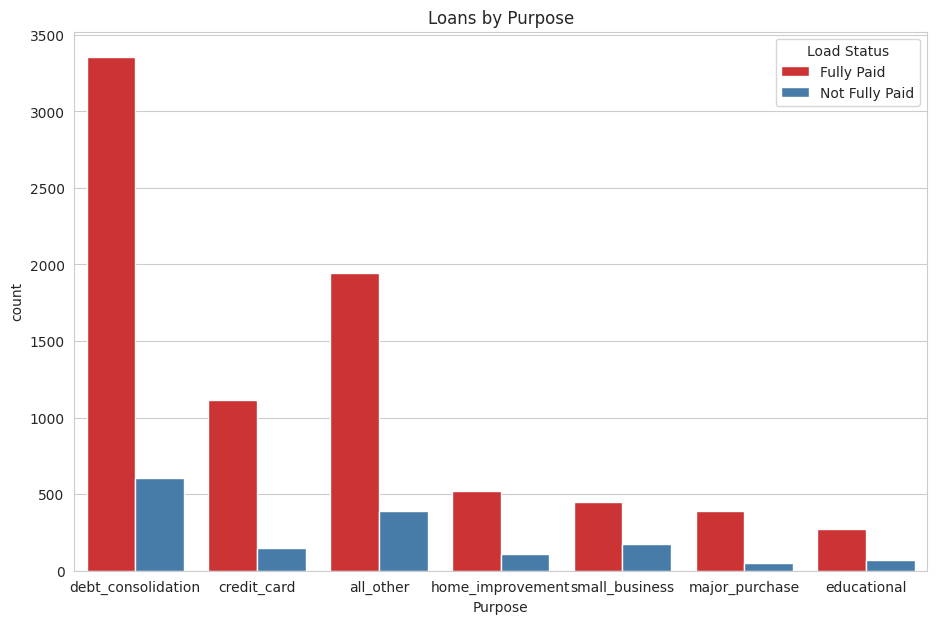

In [ ]:
# Investigate counts of loans by purpose
plt.figure(figsize=(11,7))

sns.countplot(
    x='purpose',
    hue='not.fully.paid',
    data=df,
    palette='Set1'
)


plt.title('Loans by Purpose')
plt.legend(
    title='Load Status',
    labels=['Fully Paid', 'Not Fully Paid']
)
plt.xlabel('Purpose')

Text(0.5, 36.72222222222221, 'FICO')

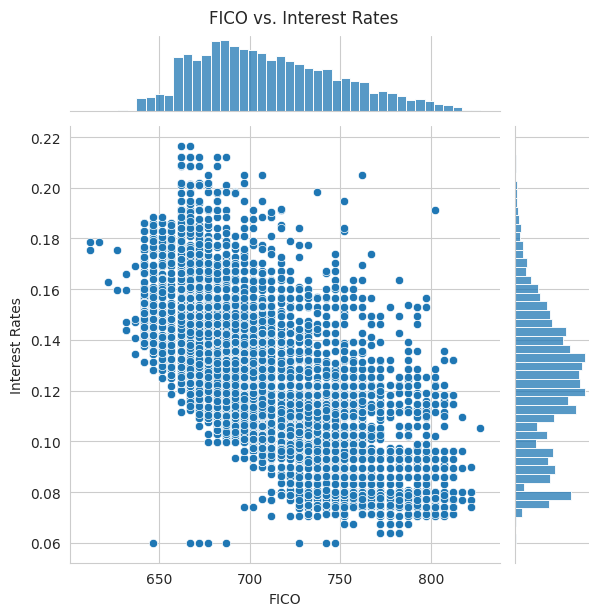

In [ ]:
# Investigate for possible correlations between FICO score and Interest Rates

joint_grid = sns.jointplot(
    data=df,
    x='fico',
    y='int.rate'
)

joint_grid.fig.suptitle('FICO vs. Interest Rates', y=1.02)

plt.ylabel('Interest Rates')
plt.xlabel('FICO')

# Prepare the Data

In [9]:
# One-hot encode the categorical data in the purpose column

df_encoded = pd.get_dummies(
    data=df,
    columns=['purpose'],
    drop_first=True
)

# Validate
df_encoded.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,False,True,False,False,False,False
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,True,False,False,False,False,False
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,False,True,False,False,False,False
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,False,True,False,False,False,False
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,True,False,False,False,False,False


## Train a Decision Tree Model

In [12]:
# The goal is to predict if a load will be fully paid

# Create the training and test features and labels
X = df_encoded.drop('not.fully.paid',axis=1)
y = df_encoded['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.30,
    random_state=42
)


In [13]:
dtree = DecisionTreeClassifier(
    random_state=42
)
dtree.fit(X_train,y_train)
dtree

DecisionTreeClassifier(random_state=42)

In [14]:
dtc_predictions = dtree.predict(X_test)

dtc_cr = classification_report(y_test,dtc_predictions)

print('Classification Report: 1 = Full Paid, 0 = Not Fully Paid')
print('')
print(dtc_cr)
print('')
print('precision: (true positives) / ((true positives) + (false positives))')
print('recall: (true positives) / ((true positives) + (false negatives))')
print('f1-score: 2 * ((precision * recall) / (precision + recall))')

Classification Report: 1 = Full Paid, 0 = Not Fully Paid

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      2408
           1       0.20      0.21      0.20       466

    accuracy                           0.74      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.74      0.74      0.74      2874


precision: (true positives) / ((true positives) + (false positives))
recall: (true positives) / ((true positives) + (false negatives))
f1-score: 2 * ((precision * recall) / (precision + recall))


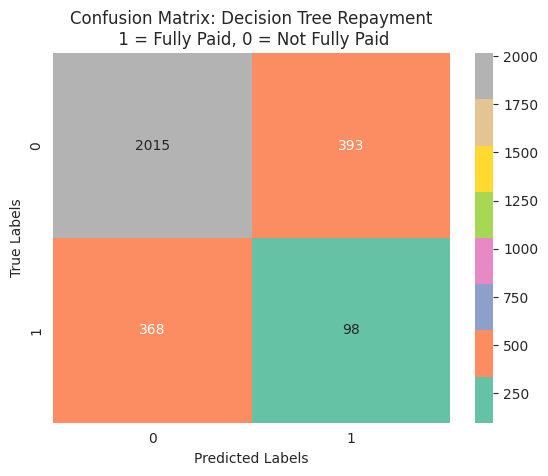

In [15]:
# Explore a confusion matrix
dtc_cm = confusion_matrix(y_test, dtc_predictions)

sns.heatmap(
    dtc_cm,
    annot=True,
    fmt='d', # string formating code
    cmap='Set2'
)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix: Decision Tree Repayment\n 1 = Fully Paid, 0 = Not Fully Paid')
plt.show()

In [ ]:
# Observations
# - Accuracy is pretty low
# - Lots of confusion

## Train a Random Forest Model

- Attempt to improve restult over the decision tree model

In [16]:
rfc = RandomForestClassifier(n_estimators=600, random_state=42)
rfc.fit(X_train,y_train)
rfc

RandomForestClassifier(n_estimators=600, random_state=42)

In [17]:
# Check out the initial model performance
rfc_predictions = rfc.predict(X_test)
rfc_cr = classification_report(y_test,rfc_predictions)

print('Classification Report: 1 = Full Paid, 0 = Not Fully Paid')
print('')
print(rfc_cr)
print('')
print('precision: (true positives) / ((true positives) + (false positives))')
print('recall: (true positives) / ((true positives) + (false negatives))')
print('f1-score: 2 * ((precision * recall) / (precision + recall))')

Classification Report: 1 = Full Paid, 0 = Not Fully Paid

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.48      0.02      0.04       466

    accuracy                           0.84      2874
   macro avg       0.66      0.51      0.48      2874
weighted avg       0.78      0.84      0.77      2874


precision: (true positives) / ((true positives) + (false positives))
recall: (true positives) / ((true positives) + (false negatives))
f1-score: 2 * ((precision * recall) / (precision + recall))


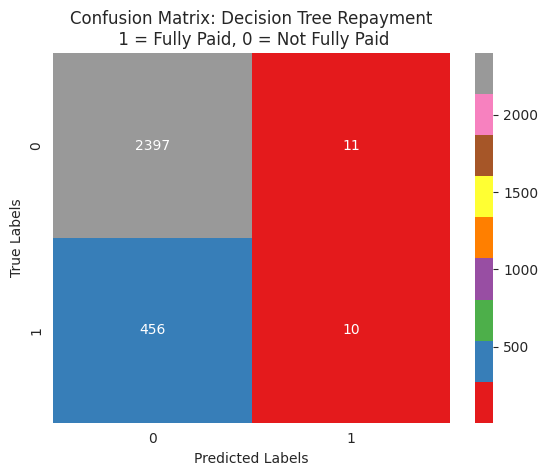

In [18]:
# Explore a confusion matrix
rfc_cm = confusion_matrix(y_test, rfc_predictions)

sns.heatmap(
    rfc_cm,
    annot=True,
    fmt='d', # string formating code
    cmap='Set1'
)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix: Decision Tree Repayment\n 1 = Fully Paid, 0 = Not Fully Paid')
plt.show()

In [ ]:
# Observations
# - Better accuracy
# - Lots of fully paid loans, predicted as not fully paid

## Hyperparameter Optimization for Random Forrest Classifier

In [19]:
# Define model
rfc_opt = RandomForestClassifier(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 300],
    'max_depth': [10, 20],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [1, 2]
}

# Grid Search
grid_search = GridSearchCV(
    estimator=rfc_opt,
    param_grid= param_grid,
    cv=5,
    n_jobs=4,
    verbose=2
)

grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)



Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}


In [20]:
 # Evaluate on test set
rfc_best = grid_search.best_estimator_
# accuracy = best_model.score(X_test, y_test)
# print("Test Accuracy:", accuracy)

# Check out the best model performance
rfc_best_predictions = rfc_best.predict(X_test)
rfc_best_cr = classification_report(y_test,rfc_best_predictions)

print('Classification Report: 1 = Full Paid, 0 = Not Fully Paid')
print('')
print(rfc_best_cr)
print('')
print('precision: (true positives) / ((true positives) + (false positives))')
print('recall: (true positives) / ((true positives) + (false negatives))')
print('f1-score: 2 * ((precision * recall) / (precision + recall))')

Classification Report: 1 = Full Paid, 0 = Not Fully Paid

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.75      0.01      0.01       466

    accuracy                           0.84      2874
   macro avg       0.79      0.50      0.46      2874
weighted avg       0.82      0.84      0.77      2874


precision: (true positives) / ((true positives) + (false positives))
recall: (true positives) / ((true positives) + (false negatives))
f1-score: 2 * ((precision * recall) / (precision + recall))


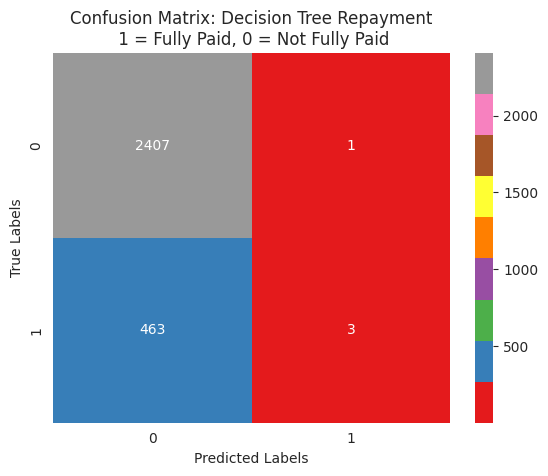

In [21]:
# Explore a confusion matrix
rfc_best_cm = confusion_matrix(y_test, rfc_best_predictions)

sns.heatmap(
    rfc_best_cm,
    annot=True,
    fmt='d', # string formating code
    cmap='Set1'
)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix: Decision Tree Repayment\n 1 = Fully Paid, 0 = Not Fully Paid')
plt.show()

In [ ]:
# Observations
# - Hyperparameter optimization did not improve results